# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request

## 2. Datos

In [3]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv", index_col=0)

### 2.1 Exploración de los datos

In [4]:
df.info()

<class 'pandas.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    str    
 1   Product           912 non-null    str    
 2   TypeName          912 non-null    str    
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    str    
 5   Cpu               912 non-null    str    
 6   Ram               912 non-null    str    
 7   Memory            912 non-null    str    
 8   Gpu               912 non-null    str    
 9   OpSys             912 non-null    str    
 10  Weight            912 non-null    str    
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), str(10)
memory usage: 92.6 KB


In [5]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [6]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [7]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


### 2.3 Definir X e y

In [8]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 11)

In [9]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [11]:
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg


In [12]:
y_train

laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

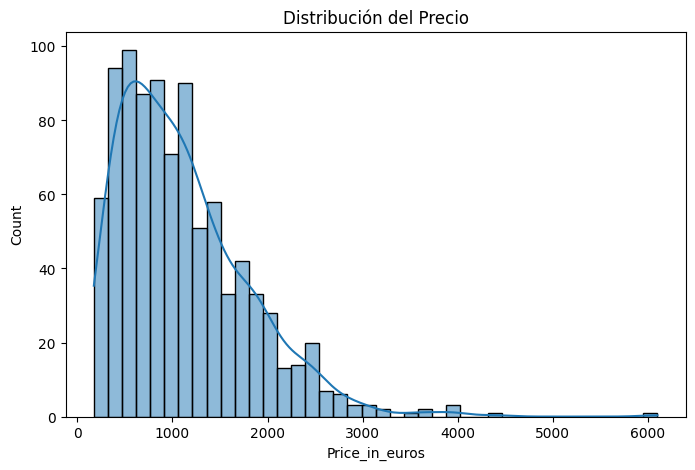

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Price_in_euros"], bins=40, kde=True)
plt.title("Distribución del Precio")
plt.show()

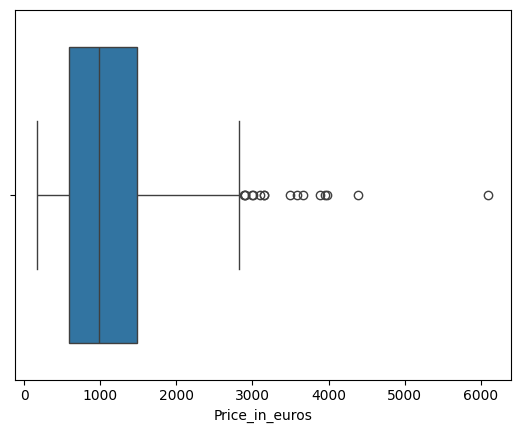

In [14]:
sns.boxplot(x=df["Price_in_euros"])
plt.show()

In [15]:
df["Weight"] = df["Weight"].str.replace("kg","").astype(float)

-----------------------------------------------------------------------------------------------------------------

In [16]:
df["Ram"] = df["Ram"].str.replace("GB","").astype(int)

In [17]:
import re

def total_storage_gb(s):
    nums = re.findall(r'(\d+(\.\d+)?)', s)  # números
    # nos quedamos con la parte principal de cada coincidencia
    values = [float(x[0]) for x in nums]
    # si en tu dataset los números ya son 128,256,1000... asumimos GB
    return int(sum(values))

df["Total_storage"] = df["Memory"].astype(str).apply(total_storage_gb)
df = df.drop(columns=["Memory"])

In [18]:
df[["Total_storage", "Ram", "Weight", "Price_in_euros"]].describe()
df["Total_storage"].value_counts().head(10)

Total_storage
256    289
1      170
500     92
512     85
129     67
128     59
257     52
32      39
64      12
2       11
Name: count, dtype: int64

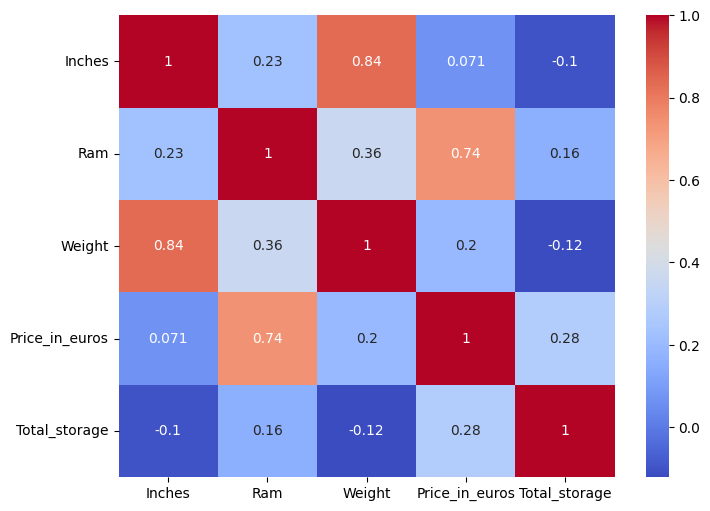

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

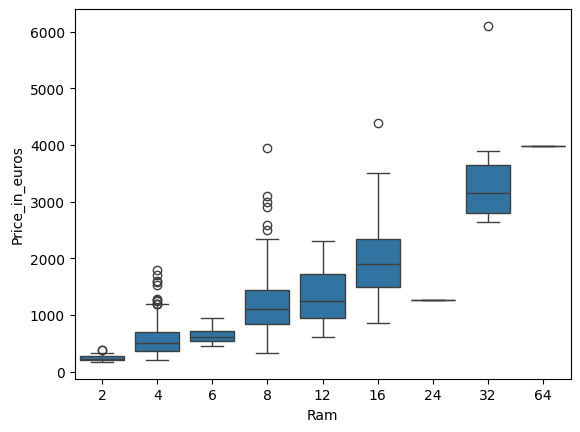

In [20]:
sns.boxplot(x=df["Ram"], y=df["Price_in_euros"])
plt.show()

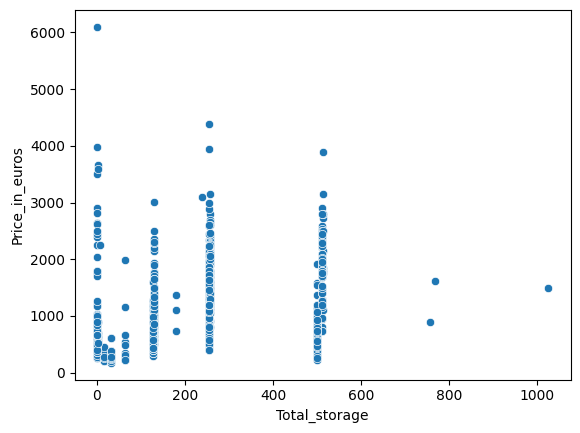

In [21]:
sns.scatterplot(x=df["Total_storage"], y=df["Price_in_euros"])
plt.show()

## 4. Modelado

### 4.1 Baseline de modelos


In [26]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


y = np.log1p(df["Price_in_euros"])
X = df.drop(columns=["Price_in_euros"]).copy()


for c in X.columns:
    if not pd.api.types.is_numeric_dtype(X[c]):
        X[c] = X[c].astype("object")


X_tr, X_va, y_tr, y_va = train_test_split(
    X, y, test_size=0.2, random_state=42
)


cat_cols = [c for c in X_tr.columns if X_tr[c].dtype == "object"]
num_cols = [c for c in X_tr.columns if c not in cat_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

model = RandomForestRegressor(
    n_estimators=600,
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])


pipe.fit(X_tr, y_tr)
print("OK: modelo entrenado")

OK: modelo entrenado


### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np


y_pred_log = pipe.predict(X_va)


y_pred = np.expm1(y_pred_log)
y_real = np.expm1(y_va)


rmse = np.sqrt(mean_squared_error(y_real, y_pred))

print("RMSE:", rmse)

RMSE: 347.10874079169923


### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [31]:

X_pred = pd.read_csv("./data/test.csv", index_col=0)


X_pred["Weight"] = X_pred["Weight"].str.replace("kg", "", regex=False).astype(float)
X_pred["Ram"] = X_pred["Ram"].str.replace("GB", "", regex=False).astype(int)

def total_storage_gb(s):
    nums = re.findall(r'(\d+(?:\.\d+)?)', str(s))
    values = [float(x) for x in nums]
    return int(sum(values))

X_pred["Total_storage"] = X_pred["Memory"].astype(str).apply(total_storage_gb)
X_pred = X_pred.drop(columns=["Memory"])


for c in X_pred.columns:
    if not pd.api.types.is_numeric_dtype(X_pred[c]):
        X_pred[c] = X_pred[c].astype("object")

X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Total_storage
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,No OS,2.400,512
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,Intel HD Graphics 400,Linux,2.400,500
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,Intel HD Graphics 520,No OS,1.900,1
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,2.191,256
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,Windows 10,1.950,256


In [32]:
X_pred.isna().sum().sort_values(ascending=False).head(10)

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
dtype: int64

In [33]:
X_pred.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Gpu                  object
OpSys                object
Weight              float64
Total_storage         int64
dtype: object

 ## 2. Replicar el procesado para ``test.csv``

In [34]:

pred_log = pipe.predict(X_pred)      # preprocesa + predice
pred_price = np.expm1(pred_log)      # volver de log a euros

pred_price[:10]

array([1693.57263503,  293.4279755 ,  367.12526187, 1042.94531585,
        880.86026107,  617.31333228,  767.0437766 ,  994.73122301,
       1397.66294892,  368.55427282])

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [35]:
sample = pd.read_csv("data/sample_submission.csv")

In [36]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [37]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [38]:
submission = sample.copy()
submission["Price_in_euros"] = pred_price

submission.head()
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [39]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [40]:
chequeador(submission)

You're ready to submit!


In [41]:
import os
os.listdir()

['data', 'gfg.png', 'Kaggle_submission.ipynb', 'submission.csv']

In [43]:
import os
print(os.getcwd())

c:\Users\sarar\Desktop\Data Science\DS-Online-Sara-Ruiz\Team_Challenges\TC_04_Sprint_12_Kaggle
